C:\Users\sum77\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Argument Z must be 2-dimensional.

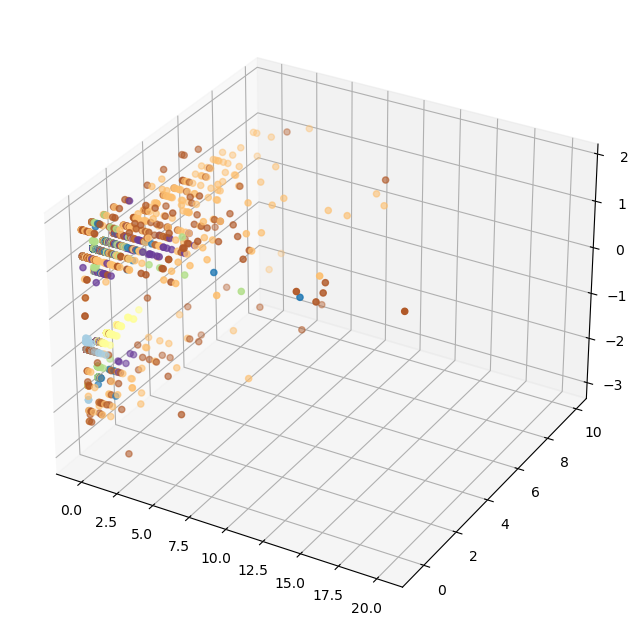

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, r2_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# SVM with no standardization (linear kernel)
svm_clf_linear = SVC(kernel='linear').fit(X_train, y_train)
y_pred_svm_linear = svm_clf_linear.predict(X_test)
acc_svm_linear = accuracy_score(y_test, y_pred_svm_linear)

# SVM with standardization via pipeline (linear kernel)
pipe_linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))
pipe_linear.fit(X_train, y_train)
acc_svm_linear_std = pipe_linear.score(X_test, y_test)

# SVM with RBF kernel and no standardization
svm_clf_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred_svm_rbf = svm_clf_rbf.predict(X_test)
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# SVM with standardization via pipeline (RBF kernel)
pipe_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe_rbf.fit(X_train, y_train)
acc_svm_rbf_std = pipe_rbf.score(X_test, y_test)
r2_std = pipe_rbf.score(X_test, y_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
# Standardize ArticleType
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate mesh grid for all three features
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
z_min, z_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict on mesh grid points
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = pipe_rbf.predict(mesh_points)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap=plt.cm.Paired)

# Plot decision boundary
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

ax.set_xlabel('CitationCount')
ax.set_ylabel('Retraction_Lag')
ax.set_zlabel('ArticleType')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, r2_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# SVM with no standardization (linear kernel)
svm_clf_linear = SVC(kernel='linear').fit(X_train, y_train)
y_pred_svm_linear = svm_clf_linear.predict(X_test)
acc_svm_linear = accuracy_score(y_test, y_pred_svm_linear)

# SVM with standardization via pipeline (linear kernel)
pipe_linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))
pipe_linear.fit(X_train, y_train)
acc_svm_linear_std = pipe_linear.score(X_test, y_test)

# SVM with RBF kernel and no standardization
svm_clf_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred_svm_rbf = svm_clf_rbf.predict(X_test)
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# SVM with standardization via pipeline (RBF kernel)
pipe_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe_rbf.fit(X_train, y_train)
acc_svm_rbf_std = pipe_rbf.score(X_test, y_test)
r2_std = pipe_rbf.score(X_test, y_test)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
# Standardize ArticleType
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate mesh grid for all three features
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
z_min, z_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict on mesh grid points
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = pipe_rbf.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Set the viewing angle (elevation and azimuth)
elevation_angle = 30  # adjust as needed
azimuth_angle = 120   # adjust as needed

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap=plt.cm.Paired)

# Plot decision boundary
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

ax.set_xlabel('CitationCount')
ax.set_ylabel('Retraction_Lag')
ax.set_zlabel('ArticleType')

# Set the viewing angle
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.show()


Accuracy: 0.46756705345253946


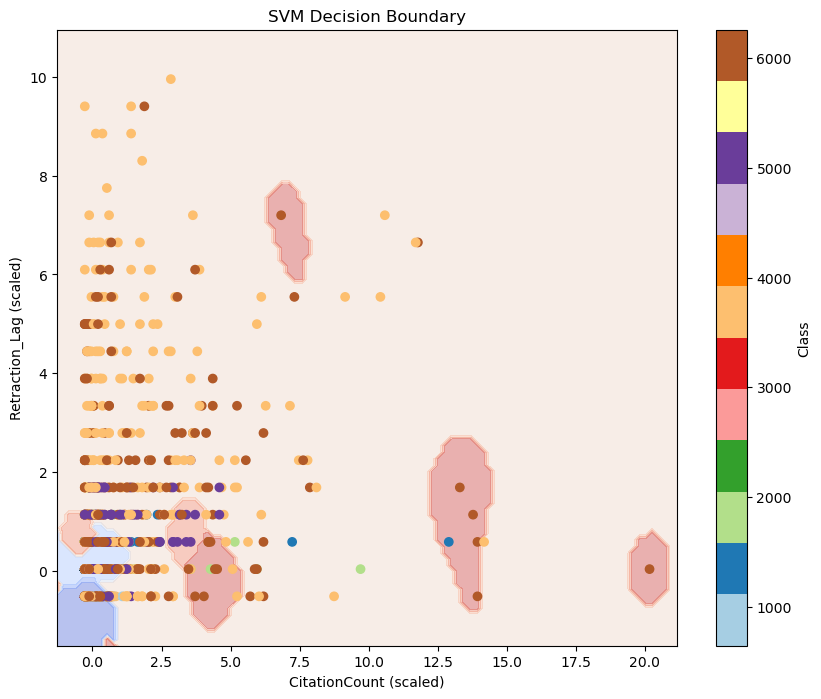

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features (excluding 'ArticleType')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :-1])  # Exclude last column (ArticleType)
X_test_scaled = scaler.transform(X_test.iloc[:, :-1])  # Exclude last column (ArticleType)

# Train SVM with RBF kernel
pipe_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = pipe_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on mesh grid points
Z = pipe_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('CitationCount (scaled)')
plt.ylabel('Retraction_Lag (scaled)')
plt.title('SVM Decision Boundary')
plt.colorbar(label='Class')
plt.show()


Accuracy: 0.46756705345253946


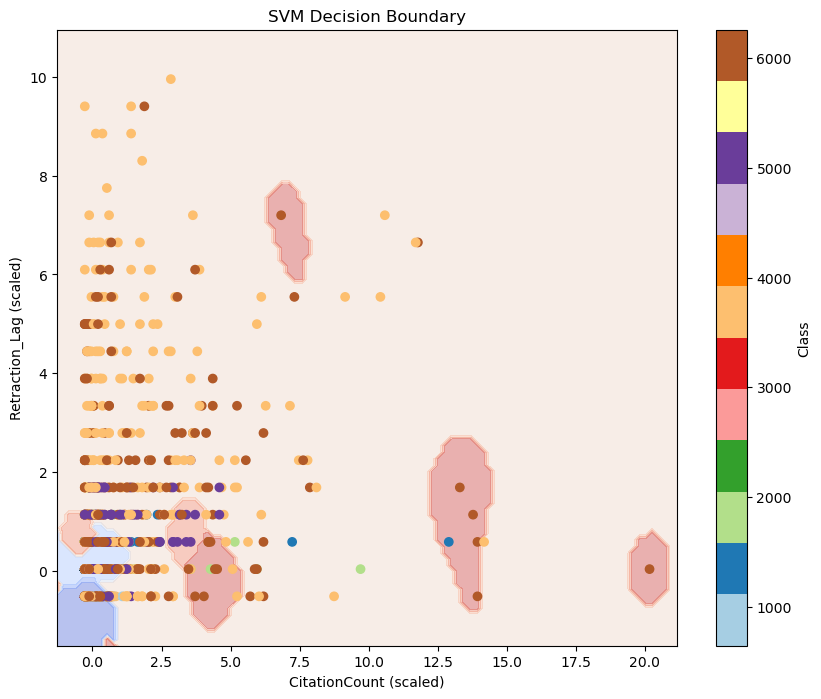

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features (excluding 'ArticleType')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :-1])  # Exclude last column (ArticleType)
X_test_scaled = scaler.transform(X_test.iloc[:, :-1])  # Exclude last column (ArticleType)

# Train SVM with RBF kernel
pipe_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = pipe_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on mesh grid points
Z = pipe_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('CitationCount (scaled)')
plt.ylabel('Retraction_Lag (scaled)')
plt.title('SVM Decision Boundary')
plt.colorbar(label='Class')
plt.show()


Accuracy: 0.4640061103685316


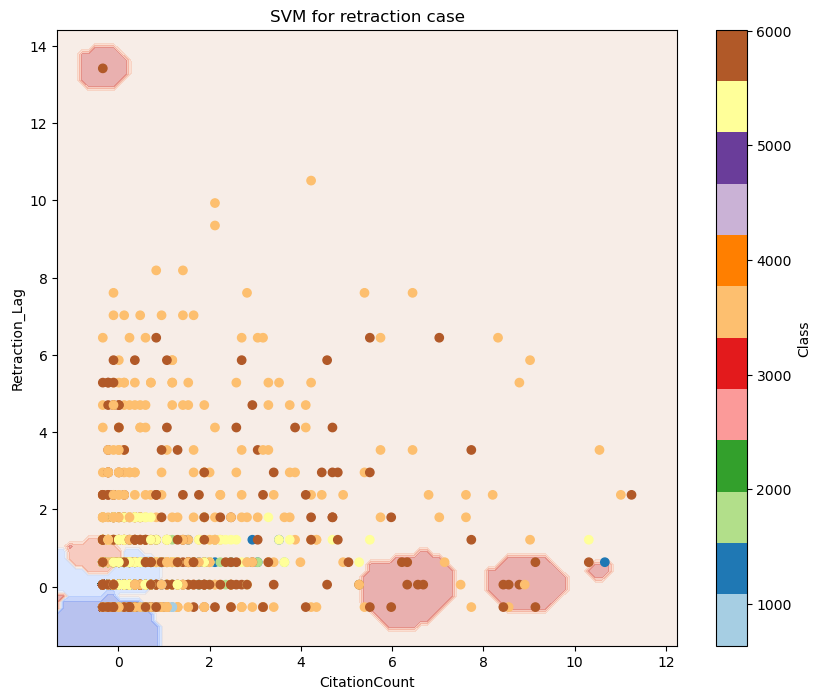

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Filter CitationCount outliers
retractions = retractions[retractions['CitationCount'] <= 100]

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features (excluding 'ArticleType')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :-1])  # Exclude last column (ArticleType)
X_test_scaled = scaler.transform(X_test.iloc[:, :-1])  # Exclude last column (ArticleType)

# Train SVM with RBF kernel
pipe_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipe_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = pipe_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on mesh grid points
Z = pipe_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('CitationCount')
plt.ylabel('Retraction_Lag')
plt.title('SVM for retraction case')
plt.colorbar(label='Class')
plt.show()


In [ ]:
#3D representation of it

Accuracy: 0.5344662974985679


ValueError: Argument Z must be 2-dimensional.

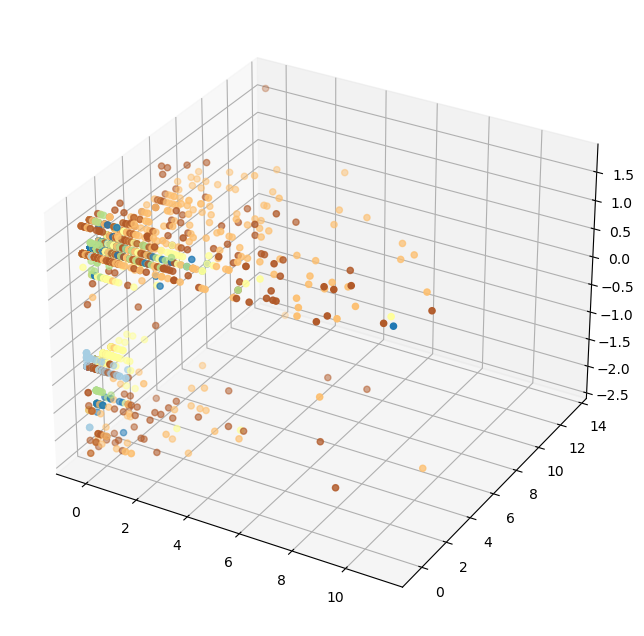

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Filter CitationCount outliers
retractions = retractions[retractions['CitationCount'] <= 100]

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
svm_clf_rbf = SVC(kernel='rbf')
svm_clf_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_clf_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
z_min, z_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100),
                         np.linspace(z_min, z_max, 100))

# Predict on mesh grid points
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = svm_clf_rbf.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Set the viewing angle (elevation and azimuth)
elevation_angle = 30  # adjust as needed
azimuth_angle = 120   # adjust as needed

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap=plt.cm.Paired)

# Plot decision boundary
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

ax.set_xlabel('CitationCount')
ax.set_ylabel('Retraction_Lag')
ax.set_zlabel('ArticleType')

# Set the viewing angle
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.show()


Accuracy: 0.524345999618102


ValueError: Argument Z must be 2-dimensional.

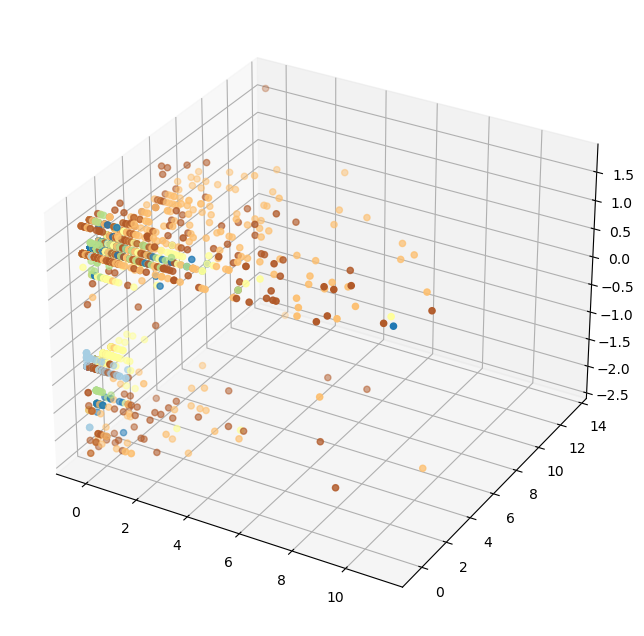

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Filter CitationCount outliers
retractions = retractions[retractions['CitationCount'] <= 100]

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
z_min, z_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100),
                         np.linspace(z_min, z_max, 100))

# Predict on mesh grid points
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = rf_clf.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Set the viewing angle (elevation and azimuth)
elevation_angle = 30  # adjust as needed
azimuth_angle = 120   # adjust as needed

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap=plt.cm.Paired)

# Plot decision boundary
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

ax.set_xlabel('CitationCount')
ax.set_ylabel('Retraction_Lag')
ax.set_zlabel('ArticleType')

# Set the viewing angle
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.show()


Accuracy: 0.45235822035516515


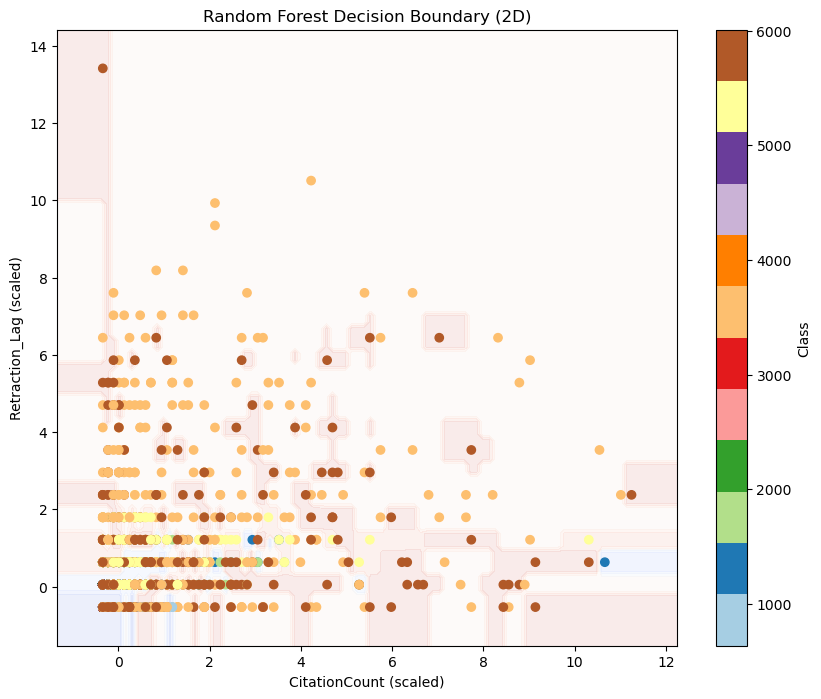

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
retractions = pd.read_csv('retractions35215.csv')

# Drop unnecessary columns
retractions = retractions.drop(['Title', 'URLS', 'RetractionDOI', 'OriginalPaperDOI', 'Notes', 'Subject', 'Journal', 'Publisher'], axis=1)

# Handling missing values (Dropping Null Rows)
retractions = retractions.dropna()

# Filter CitationCount outliers
retractions = retractions[retractions['CitationCount'] <= 100]

# Feature Engineering
retractions['Publication_Year'] = pd.to_datetime(retractions['OriginalPaperDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Year'] = pd.to_datetime(retractions['RetractionDate'], format='%d/%m/%Y', dayfirst=True).dt.year
retractions['Retraction_Lag'] = (retractions['Retraction_Year'] - retractions['Publication_Year']) / 365.25

# Select features and target variable
features = ['CitationCount', 'Retraction_Lag', 'ArticleType']
retractions['ArticleType'] = retractions['ArticleType'].astype('category').cat.codes

# Use 'Reason' as the target variable and encode it
retractions['Reason'] = retractions['Reason'].astype('category').cat.codes
y = retractions['Reason']

# Filter for top n most frequent classes
n = 10
top_classes = y.value_counts().index[:n]
filtered_data = retractions[retractions['Reason'].isin(top_classes)]

X = filtered_data[features]
y = filtered_data['Reason']

# Ensure balanced splitting using StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train_scaled[:, :2], y_train)  # Using only the first two features for visualization

# Make predictions
y_pred = rf_clf.predict(X_test_scaled[:, :2])  # Using only the first two features for visualization
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = rf_clf.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.1, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('CitationCount (scaled)')
plt.ylabel('Retraction_Lag (scaled)')
plt.title('Random Forest Decision Boundary (2D)')
plt.colorbar(label='Class')
plt.show()
